### This notebook classifies the samples based on their spectral peaks.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

A function for examining model metrics

In [2]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Show the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)


Read in the dataset.

In [7]:
# df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")
 df = pd.read_csv("../../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")

In [5]:
df.head()

,Unnamed: 0,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,0,201210-1-00,0,200.00000,201210-1,Normal,1.000000
1,1,201210-1-00,1,200.68336,201210-1,Normal,0.982870
2,2,201210-1-00,2,201.36674,201210-1,Normal,0.966481
3,3,201210-1-00,3,202.05011,201210-1,Normal,0.950833
4,4,201210-1-00,4,202.73349,201210-1,Normal,0.935925


In [6]:
sample = df[df['SpecID'] == "210526-3-04"]

<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

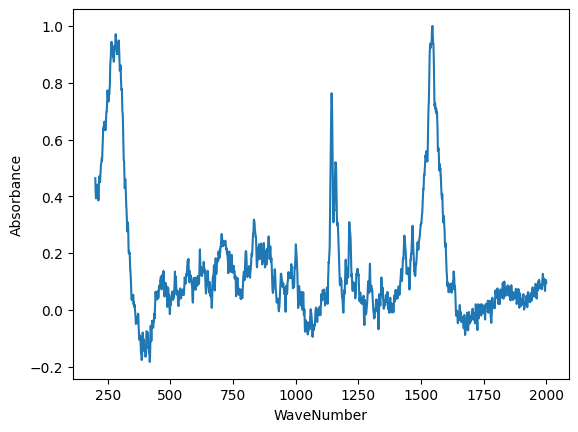

In [7]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [8]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None

Add the statuses back.

In [9]:
statuses = df[['SpecID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

In [8]:
pivoted_df.head()

,SpecID,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,206.83371,207.51709,208.20045,208.88382,209.5672,210.25056,210.93394,211.61731,212.30069,212.98405,213.66742,214.3508,215.03416,215.71754,216.40091,217.08429,217.76765,218.45102,219.1344,219.81776,220.50114,221.18451,221.86787,222.55125,223.23462,223.918,224.60136,225.28474,225.96811,226.65147,227.33485,228.01822,228.7016,229.38496,230.06834,230.75171,231.43507,232.11845,232.80182,233.4852,234.16856,234.85193,235.53531,236.21867,236.90205,237.58542,238.2688,238.95216,239.63553,240.31891,241.00227,241.68565,242.36902,243.0524,243.73576,244.41913,245.10251,245.78587,246.46925,247.15262,247.83598,248.51936,249.20273,249.88611,250.56947,251.25285,251.93622,252.61958,253.30296,253.98633,254.66971,255.35307,256.03644,256.71982,257.4032,258.08655,258.76993,259.45331,260.13669,260.82004,261.50342,262.1868,262.87015,263.55353,264.23691,264.92029,265.60364,266.28702,266.9704,267.65375,268.33713,269.02051,269.70386,270.38724,271.07062,271.754,272.43735,273.12073,273.80411,274.48746,275.17084,275.85422,276.5376,277.22095,277.90433,278.58771,279.27106,279.95444,280.63782,281.3212,282.00455,282.68793,283.37131,284.05466,284.73804,285.42142,286.1048,286.78815,287.47153,288.15491,288.83826,289.52164,290.20502,290.8884,291.57175,292.25513,292.93851,293.62186,294.30524,294.98862,295.67197,296.35535,297.03873,297.72211,298.40546,299.08884,299.77222,300.45557,301.13895,301.82233,302.50571,303.18906,303.87244,304.55582,305.23917,305.92255,306.60593,307.28931,307.97266,308.65604,309.33942,310.02277,310.70615,311.38953,312.07291,312.75626,313.43964,314.12302,314.80637,315.48975,316.17313,316.85651,317.53986,318.22324,318.90662,319.58997,320.27335,320.95673,321.64011,322.32346,323.00684,323.69022,324.37357,325.05695,325.74033,326.42368,327.10706,327.79044,328.47382,329.15717,329.84055,330.52393,331.20728,331.89066,332.57404,333.25742,333.94077,334.62415,335.30753,335.99088,336.67426,337.35764,338.04102,338.72437,339.40775,340.09113,340.77448,341.45786,342.14124,342.82462,343.50797,344.19135,344.87473,345.55807,346.24146,346.92484,347.60822,348.29156,348.97495,349.65833,350.34167,351.02505,351.70844,352.39178,353.07516,353.75854,354.44193,355.12527,355.80865,356.49203,357.17538,357.85876,358.54214,359.22552,359.90887,360.59225,361.27563,361.95898,362.64236,363.32574,364.00912,364.69247,365.37585,366.05923,366.74258,367.42596,368.10934,368.79272,369.47607,...,1830.5239,1831.2073,1831.8906,1832.574,1833.2574,1833.9408,1834.6241,1835.3075,1835.9908,1836.6743,1837.3577,1838.041,1838.7244,1839.4077,1840.0911,1840.7745,1841.4579,1842.1412,1842.8246,1843.5079,1844.1913,1844.8748,1845.5581,1846.2415,1846.9248,1847.6082,1848.2916,1848.975,1849.6583,1850.3417,1851.025,1851.7084,1852.3918,1853.0752,1853.7585,1854.4419,1855.1252,1855.8087,1856.4921,1857.1754,1857.8588,1858.5421,1859.2255,1859.9089,1860.5923,1861.2756,1861.959,1862.6423,1863.3257,1864.0092,1864.6925,1865.3759,1866.0592,1866.7426,1867.426,1868.1094,1868.7927,1869.4761,1870.1594,1870.8428,1871.5262,1872.2096,1872.8929,1873.5763,1874.2596,1874.943,1875.6265,1876.3098,1876.9932,1877.6765,1878.3599,1879.0433,1879.7267,1880.41,1881.0934,1881.7767,1882.4601,1883.1436,1883.8269,1884.5103,1885.1936,1885.877,1886.5604,1887.2438,1887.9271,1888.6105,1889.2938,1889.9772,1890.6606,1891.344,1892.0273,1892.7107,1893.394,1894.0774,1894.7609,1895.4442,1896.1276,1896.8109,1897.4943,1898.1777,1898.8611,1899.5444,1900.2278,1900.9111,1901.5945,1902.278,1902.9613,1903.6447,1904.328,1905.0114,1905.6947,1906.3782,1907.0615,1907.7449,1908.4282,1909.1116,1909.795,1910.4784,1911.1617,1911.8451,1912.5284,1913.2118,1913.8953,1914.5786,1915.262,1915.9453,1916.6287,1917.3121,1917.9955,1918.6788,1919.3622,1920.0455,1920.7289,1921.4124,1922.0957,1922.7791,1923.4624,1924.1458,1924.8291,1925.5126,1926.1959,1926.8793,1927.5626,1928.246,1928.9294,1929.6128,1930.2961,1930.9795,1931.6628,1932.3462,1933.0297,1933.713,1934.3964,1935.0797

##### PyCaret

In [9]:
import pandas as pd
from pycaret.classification import *

Set up the PyCaret environment

In [10]:
caret = setup(data=pivoted_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2637)"
5,Transformed data shape,"(3045, 2637)"
6,Transformed train set shape,"(2131, 2637)"
7,Transformed test set shape,"(914, 2637)"
8,Numeric features,2635
9,Categorical features,1


Compare models

In [11]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:10:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8466,0.0000,0.8466,0.8497,0.8465,0.7691,0.7706,0.8280
rf,Random Forest Classifier,0.8283,0.0000,0.8283,0.8366,0.8279,0.7412,0.7456,1.5010
lr,Logistic Regression,0.6523,0.0000,0.6523,0.6685,0.6440,0.4730,0.4849,3.5980
svm,SVM - Linear Kernel,0.6091,0.0000,0.6091,0.6383,0.5815,0.4045,0.4288,1.1240
ridge,Ridge Classifier,0.6021,0.0000,0.6021,0.6353,0.5767,0.3932,0.4123,0.7970
nb,Naive Bayes,0.3496,0.0000,0.3496,0.1222,0.1811,0.0000,0.0000,0.7800
dt,Decision Tree Classifier,0.3496,0.0000,0.3496,0.1222,0.1811,0.0000,0.0000,0.8780
qda,Quadratic Discriminant Analysis,0.3496,0.0000,0.3496,0.1222,0.1811,0.0000,0.0000,1.0650


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

Create the model

In [ ]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8879,0.9838,0.8879,0.8942,0.8884,0.8319,0.8344
1,0.9155,0.9865,0.9155,0.9166,0.9157,0.8731,0.8734
2,0.8826,0.9817,0.8826,0.8841,0.8828,0.8236,0.8241
3,0.9108,0.9760,0.9108,0.9154,0.9113,0.8662,0.8678
4,0.9014,0.9842,0.9014,0.9032,0.9014,0.8519,0.8527
5,0.9014,0.9807,0.9014,0.9010,0.9010,0.8517,0.8519
6,0.9390,0.9918,0.9390,0.9401,0.9391,0.9084,0.9087
7,0.8967,0.9816,0.8967,0.8971,0.8967,0.8446,0.8448
8,0.8826,0.9743,0.8826,0.8844,0.8826,0.8238,0.8247


In [ ]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8178,0.9609,0.8178,0.8228,0.8176,0.7264,0.7286
1,0.8545,0.9711,0.8545,0.8575,0.8541,0.7812,0.7830
2,0.8357,0.9652,0.8357,0.8422,0.8358,0.7523,0.7555
3,0.8779,0.9577,0.8779,0.8809,0.8783,0.8166,0.8176
4,0.8357,0.9658,0.8357,0.8390,0.8350,0.7525,0.7548
5,0.8638,0.9703,0.8638,0.8635,0.8637,0.7952,0.7952
6,0.8638,0.9733,0.8638,0.8683,0.8635,0.7948,0.7973
7,0.8826,0.9704,0.8826,0.8866,0.8830,0.8235,0.8251
8,0.8216,0.9611,0.8216,0.8255,0.8208,0.7314,0.7340


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…